In [1]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal

In [5]:
class QuadState(TypedDict):
    a: int
    b: int
    c: int
    
    equation: str
    discriminant: float
    result: str

In [17]:
def show_equation(state: QuadState):
    equation = f"{state['a']}x2{state['b']}x{state['c']}"

    return {"equation": equation}


def calculate_discriminant(state: QuadState):
    discriminant = state['b']**2 - (4*state['a']*state['c'])

    return {"discriminant": discriminant}

In [ ]:
graph = StateGraph(QuadState)

# node
graph.add_node("show_equation", show_equation)
graph.add_node("calculate_discriminant", calculate_discriminant)
graph.add_node("real_roots", real_roots)
graph.add_node("repeated_roots", repeated_roots)
graph.add_node("no_real_roots", no_real_roots)

# egde
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calculate_discriminant")
graph.add_edge("calculate_discriminant", END)

workflow = graph.compile()

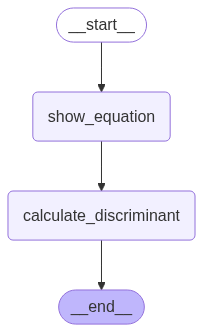

In [19]:
workflow

In [20]:
initial_state = {
    "a": 4,
    "b": -5,
    "c": -10
}
workflow.invoke(initial_state)

{'a': 4, 'b': -5, 'c': -10, 'equation': '4x2-5x-10', 'discriminant': 185}